In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

import cufflinks as cf

import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import seaborn as sns
import matplotlib.pylab as plt

init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style("whitegrid")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
df=pd.read_csv("../input/online-chess-games/chess_games.csv",index_col=["game_id"])
df.drop(["white_id","black_id"],axis=1,inplace=True)
df

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
3,True,61,Mate,White,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
4,True,61,Mate,White,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
5,True,95,Mate,White,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054,True,24,Resign,White,10+10,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,2,Dutch Defense,Dutch Defense,NaN,NaN
20055,True,82,Mate,Black,10+0,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,2,Queen's Pawn,Queen's Pawn,NaN,NaN
20056,True,35,Mate,White,10+0,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,3,Queen's Pawn Game: Mason Attack,Queen's Pawn Game,NaN,Mason Attack


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 1 to 20058
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_rating       20058 non-null  int64 
 6   black_rating       20058 non-null  int64 
 7   moves              20058 non-null  object
 8   opening_code       20058 non-null  object
 9   opening_moves      20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
 12  opening_response   1207 non-null   object
 13  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(9)
memory usage: 2.2+ MB


In [4]:
df.describe()

,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [5]:
fig=px.pie(df["winner"].value_counts(),names=df["winner"].value_counts().index,values=df["winner"].value_counts().values,
           title="Percentage of Winners",
            color_discrete_sequence=["#FDFEFE","#17202A"," #3498DB"],
           labels={"names":"Player","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

In [6]:
sample=df[["winner","white_rating","black_rating"]].rename(columns={"white_rating":"white","black_rating":"black"})
sample

,winner,white,black
game_id,,,
1,White,1500,1191
2,Black,1322,1261
3,White,1496,1500
4,White,1439,1454
5,White,1523,1469
...,...,...,...
20054,White,1691,1220
20055,Black,1233,1196
20056,White,1219,1286


In [7]:
sample["w>b"]=(sample["white"] > sample["black"])
sample 

,winner,white,black,w>b
game_id,,,,
1,White,1500,1191,True
2,Black,1322,1261,True
3,White,1496,1500,False
4,White,1439,1454,False
5,White,1523,1469,True
...,...,...,...,...
20054,White,1691,1220,True
20055,Black,1233,1196,True
20056,White,1219,1286,False


In [8]:
mask=((sample["winner"]=="White" )& (sample["w>b"]==True)) | ((sample["winner"]=="Black") & (sample["w>b"]==False))
sample["high_winn"]="low_rank win"
sample.loc[mask,"high_winn"]="high_rank win"
sample

,winner,white,black,w>b,high_winn
game_id,,,,,
1,White,1500,1191,True,high_rank win
2,Black,1322,1261,True,low_rank win
3,White,1496,1500,False,low_rank win
4,White,1439,1454,False,low_rank win
5,White,1523,1469,True,high_rank win
...,...,...,...,...,...
20054,White,1691,1220,True,high_rank win
20055,Black,1233,1196,True,low_rank win
20056,White,1219,1286,False,low_rank win


In [9]:
fig=px.pie(sample["high_winn"].value_counts(),names=sample["high_winn"].value_counts().index,values=sample["high_winn"].value_counts().values,
           title="Winnig Situation",
            color_discrete_sequence=["#FDFEFE","#17202A"],
           labels={"names":"Situation ","values":"Count "}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Situation")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

In [10]:
df["opening_move"]=df["moves"].str.slice(0,2)

In [11]:
black=df[df["winner"]=="Black"].opening_move.value_counts().nlargest(10)
black

e4    5651
d4    2043
c4     305
Nf     292
e3     255
g3      95
b3      83
f4      82
d3      79
Nc      55
Name: opening_move, dtype: int64

In [12]:
fig=px.bar(y=black.index,x=black.values,
           title="most used oppening moves, black wins".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

In [13]:
white=df[df["winner"]=="White"].opening_move.value_counts().nlargest(10)
fig=px.bar(y=white.index,x=white.values,
           title="most used oppening moves, White wins".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=True)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

In [14]:
opening=df["opening_shortname"].value_counts().nlargest(5)
opening

Sicilian Defense     2632
French Defense       1412
Queen's Pawn Game    1233
Italian Game          981
King's Pawn Game      917
Name: opening_shortname, dtype: int64

In [15]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Move "},
           text=opening.values
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=False)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

In [16]:
df["winner"].value_counts(normalize=True)

White    0.498604
Black    0.454033
Draw     0.047363
Name: winner, dtype: float64

In [17]:
sample_distribution=[]
for _ in range(5000):
    # making samples from the main data
    sample=df.sample(len(df),replace=True)
    diff=sample["winner"].value_counts(normalize=True)[0]-sample["winner"].value_counts(normalize=True)[1]
    sample_distribution.append(diff)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



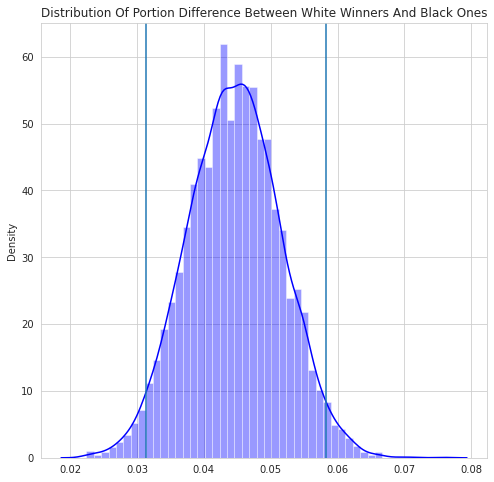

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(sample_distribution,kde=True,color="blue")
plt.title("Distribution Of Portion Difference Between White Winners And Black Ones")
plt.axvline(np.percentile(sample_distribution,2.5)) 
plt.axvline(np.percentile(sample_distribution,97.5))

In [19]:
np.percentile(sample_distribution,2.5),np.percentile(sample_distribution,97.5)

(0.031407667763485914, 0.058232376109283036)

In [20]:
null_diff=0
std= np.std(sample_distribution)
normal=np.random.normal(loc=0,scale=std,size=5000)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Portion Difference Assuming The Null Hypothesis')

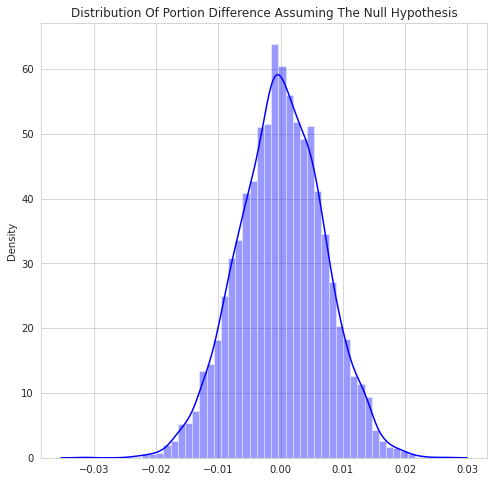

In [21]:
plt.figure(figsize=(8,8))
sns.distplot(normal,kde=True,color="blue")
plt.title("Distribution Of Portion Difference Assuming The Null Hypothesis")

In [22]:
sample_statistic=(sample["winner"].value_counts(normalize=True)[0])-(sample["winner"].value_counts(normalize=True)[1])
sample_statistic

0.0470635158041679

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



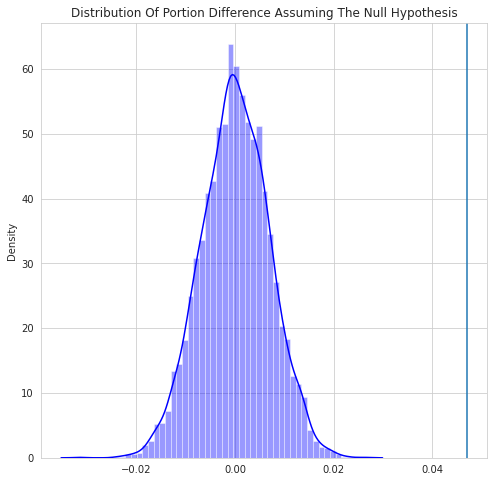

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(normal,kde=True,color="blue")
plt.title("Distribution Of Portion Difference Assuming The Null Hypothesis")
plt.axvline(sample_statistic)

In [24]:
p_value= (normal>sample_statistic).mean()
p_value

0.0

In [25]:
s=df.sample(5000)
df["winner"].value_counts(normalize=True)

White    0.498604
Black    0.454033
Draw     0.047363
Name: winner, dtype: float64

In [26]:
dist= []
for _ in range(5000):
    sample = s.sample(len(df),replace=True)
    white_winner = sample.winner.value_counts(normalize=True)[0]
    black_winner = sample.winner.value_counts(normalize=True)[1]
    diff_in_means = white_winner - black_winner
    dist.append(diff_in_means)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



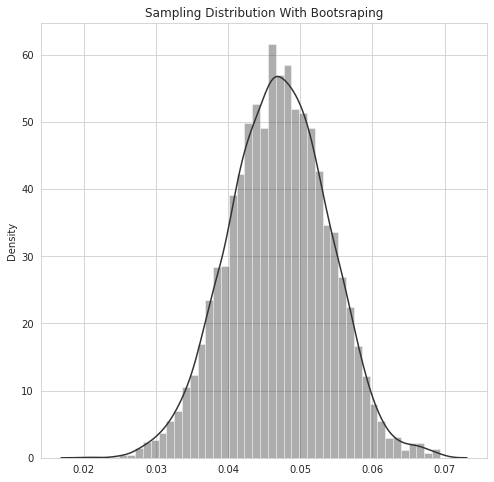

In [27]:
plt.figure(figsize=(8,8))
sns.distplot(dist,kde=True,color="#333")
plt.title("Sampling Distribution With Bootsraping")
plt.show() 

In [28]:
np.std(dist)

0.006867399684271548

In [29]:
np.mean(dist)

0.04700998105494067

In [30]:
np.percentile(dist,2.5)

0.03350159537341707

In [31]:
np.mean(dist) - 1.96 * np.std(dist)

0.033549877673768436

In [32]:
np.percentile(dist,97.5)

0.06017549107587988

In [33]:
np.mean(dist) + 1.96 * np.std(dist)

0.0604700844361129

<Figure size 576x576 with 0 Axes>

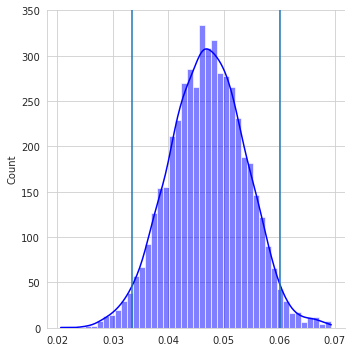

In [34]:
plt.figure(figsize=(8,8))
sns.displot(dist,kde=True,color="blue")
plt.axvline(np.percentile(dist,2.5))
plt.axvline(np.percentile(dist,97.5))
plt.show() 

In [35]:
np.percentile(dist,2.5),np.percentile(dist,97.5)

(0.03350159537341707, 0.06017549107587988)